In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [4]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve)

In [8]:
df = pd.read_csv("student_data.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [9]:
df.drop_duplicates()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [10]:
y = df['G3'] 
X = df.drop(columns=['G3'])

In [16]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
X['Mjob'] = le.fit_transform(X['Mjob'].astype(str))
X['Fjob'] = le.fit_transform(X['Fjob'].astype(str))

In [18]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

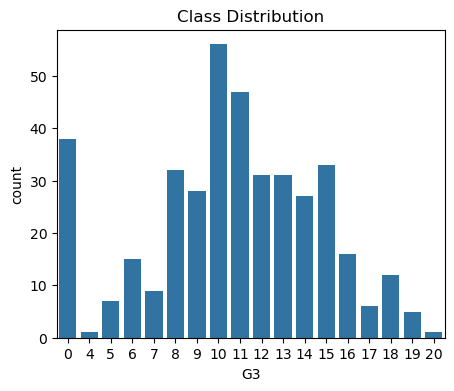

In [19]:
plt.figure(figsize=(5,4))
sns.countplot(x=y)
plt.title("Class Distribution")
plt.show()

In [ ]:
plt.figure(figsize=(25,16))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

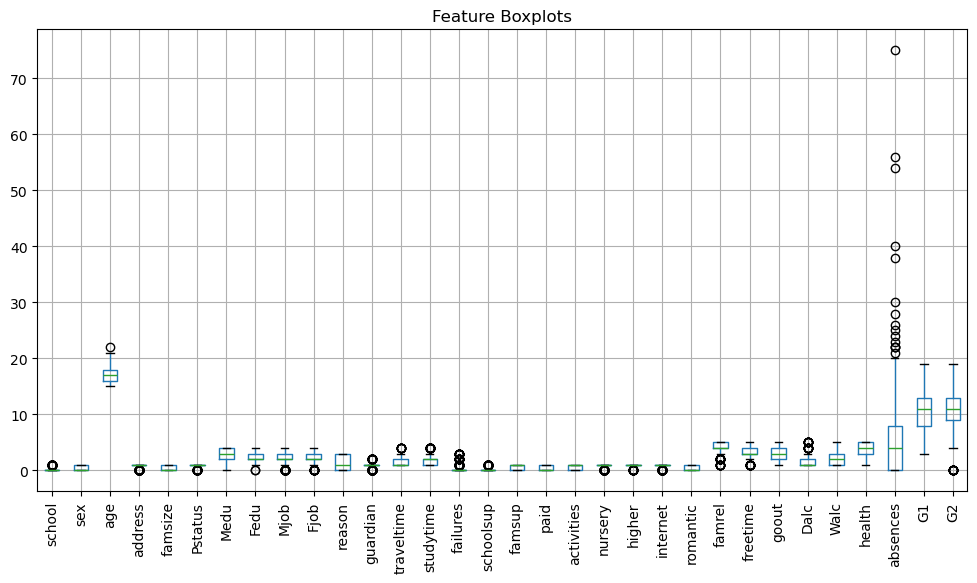

In [23]:
plt.figure(figsize=(12,6))
X.boxplot(rot=90)
plt.title("Feature Boxplots")
plt.show()


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [28]:
y_pred_dt = dt.predict(X_test)

In [29]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [30]:
y_pred_nb = nb.predict(X_test)

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
y_pred_rf = rf.predict(X_test)

In [34]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)
bagging.fit(X_train, y_train)
y_pred_bagging = bagging.predict(X_test)

In [35]:
from sklearn.ensemble import AdaBoostClassifier

boosting = AdaBoostClassifier(
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)
boosting.fit(X_train, y_train)
y_pred_boosting = boosting.predict(X_test)

In [38]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimators = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('nb', GaussianNB())
]

stacking = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    passthrough=True
)

stacking.fit(X_train, y_train)
y_pred_stacking = stacking.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

models = {
    "Decision Tree": y_pred_dt,
    "Naive Bayes": y_pred_nb,
    "Random Forest": y_pred_rf,
    "Bagging": y_pred_bagging,
    "Boosting": y_pred_boosting,
    "Stacking": y_pred_stacking
}

results = []
for name, preds in models.items():
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds, average="weighted"),
        "Recall": recall_score(y_test, preds, average="weighted"),
        "F1-score": f1_score(y_test, preds, average="weighted")
    })

df_results = pd.DataFrame(results)
print(df_results)


           Model  Accuracy  Precision    Recall  F1-score
0  Decision Tree  0.329114   0.409991  0.329114  0.338434
1    Naive Bayes  0.151899   0.147910  0.151899  0.118463
2  Random Forest  0.354430   0.322477  0.354430  0.314981
3        Bagging  0.379747   0.382706  0.379747  0.353297
4       Boosting  0.227848   0.087284  0.227848  0.121772
5       Stacking  0.354430   0.366135  0.354430  0.334732


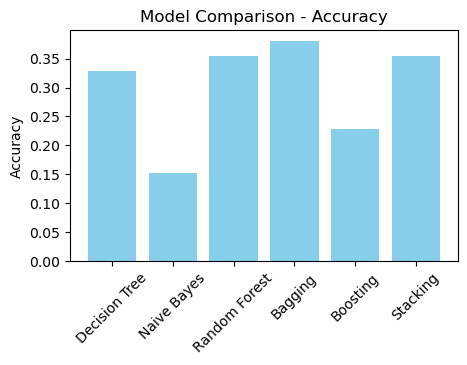

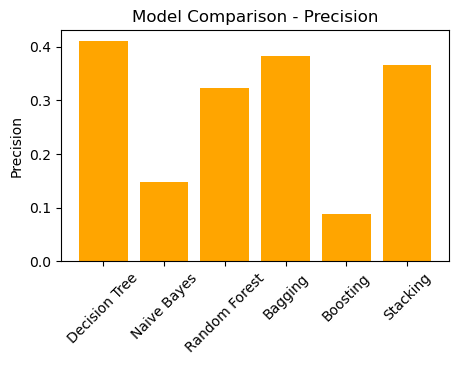

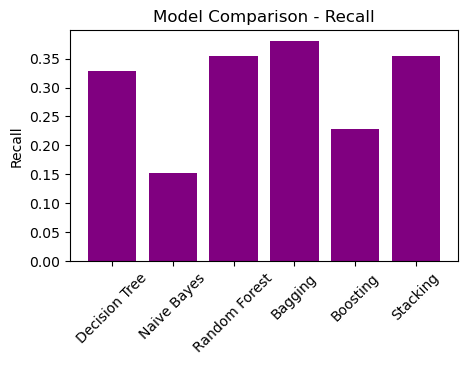

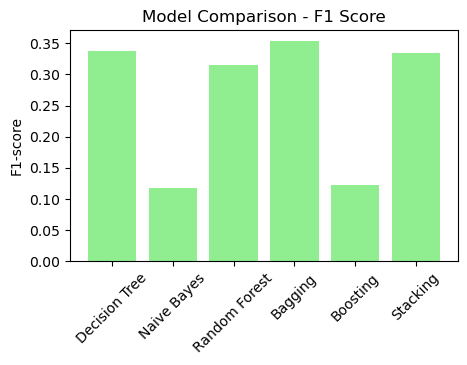

In [43]:
import matplotlib.pyplot as plt

# Accuracy Bar Plot
plt.figure(figsize=(5,3))
plt.bar(df_results["Model"], df_results["Accuracy"], color="skyblue")
plt.title("Model Comparison - Accuracy")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()

# Precision Bar Plot
plt.figure(figsize=(5,3))
plt.bar(df_results["Model"], df_results["Precision"], color="orange")
plt.title("Model Comparison - Precision")
plt.ylabel("Precision")
plt.xticks(rotation=45)
plt.show()

# Recall Bar Plot
plt.figure(figsize=(5,3))
plt.bar(df_results["Model"], df_results["Recall"], color="purple")
plt.title("Model Comparison - Recall")
plt.ylabel("Recall")
plt.xticks(rotation=45)
plt.show()

# F1-score Bar Plot
plt.figure(figsize=(5,3))
plt.bar(df_results["Model"], df_results["F1-score"], color="lightgreen")
plt.title("Model Comparison - F1 Score")
plt.ylabel("F1-score")
plt.xticks(rotation=45)
plt.show()